In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. The Wien displacement law

<br>

The Planck radiation law describes the spectral density of radiation emitted by a black body in equilibrium.  
Before it was derived, others had noted that peak of the distribution changed as a function of temperature.   
This is the reason, for example, why a piece of metal glows 'red hot' at certain temperatures, but at very high temperatures glows 'white hot'.

Wilhelm Wien derived a relationship between temperature and the wavelength at which the black body spectral radiance peaks
$$ \lambda_{max} = \frac{b}{T}$$
where $b$ is the _Wien displacement constant_.

Later, the Planck radiation law gave an exact expression for the black body spectral radiance at a given temperature and wavelength:

$$ u_\lambda (\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{e^{h c / \lambda k_B T} - 1} $$

In this exercise, we will use the Planck expression to estimate the value of $b$.



<br> 
### Exercise 1
Define a function which returns the Planck radiation law as a function of wavelength and temperature.   
Plot the curve (in the range $10<\lambda<1200$ nm) for several values of temperature in the range $3000$ K $< 8000$ K .

In [2]:
from scipy import constants
h = constants.Planck
c = constants.speed_of_light
kB = constants.Boltzmann

def planck(wl, temp):
    return (2 * h * c**2 / wl**5) / (np.exp(h*c/(wl * kB * temp)) -1)    

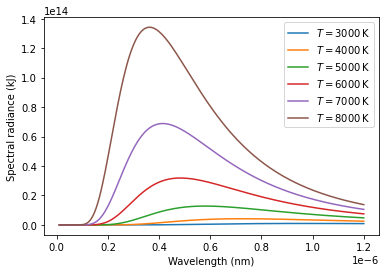

In [5]:
wls = np.linspace(1E-8, 1.2E-6, 200)
Ts = np.linspace(3000, 8000, 6)

fig, ax = plt.subplots()
for temp in Ts:
    ax.plot(wls, planck(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$')
    
ax.ticklabel_format(axis='both', style='sci', scilimits=(-3,3))

ax.set_ylabel('Spectral radiance (kJ)')
ax.set_xlabel('Wavelength (nm)')

ax.legend()
plt.show()

### Exercise 2
Write a function which uses the scipy library to find the wavelength for which the Planck expression is maximum at a given temperature.   
Replot the figure above, this time also indicating the maximum point


In [6]:
from scipy.optimize import minimize_scalar

In [7]:
def planck2(wl, temp):
    return -planck(wl, temp)

def find_max_wl(temp):
    fmin=minimize_scalar(planck2, bracket=(0.2E-7, 2E-6), args=(temp))
    return fmin.x, -fmin.fun

In [8]:
##positions of maxima for each T
maxl, maxv = np.zeros_like(Ts), np.zeros_like(Ts)

for i, temp in enumerate(Ts):
    maxl[i], maxv[i] = find_max_wl(temp)

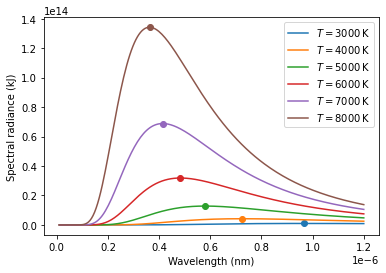

In [9]:


fig, ax = plt.subplots()
for i, temp in enumerate(Ts):
    line, = ax.plot(wls, planck(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$')
    dot, = ax.plot(maxl[i], maxv[i], 'o', color=line.get_color()) #sets the colour of the dot to that of the line 
ax.ticklabel_format(axis='both', style='sci', scilimits=(-3,3))
ax.set_ylabel('Spectral radiance (kJ)')
ax.set_xlabel('Wavelength (nm)')
ax.legend()
plt.show()

In [10]:
malx

NameError: name 'malx' is not defined

In [11]:
maxl

array([9.65926866e-07, 7.24440332e-07, 5.79554468e-07, 4.82960615e-07,
       4.13964419e-07, 3.62225258e-07])

In [12]:

    maxl[0], maxv[0] 
    

(9.659268664213525e-07, 995248946206.114)

In [13]:
for i, temp in enumerate(Ts):
    maxl[i], maxv[i] = find_max_wl(temp)
    print(temp)

3000.0
4000.0
5000.0
6000.0
7000.0
8000.0


[345.09288486]


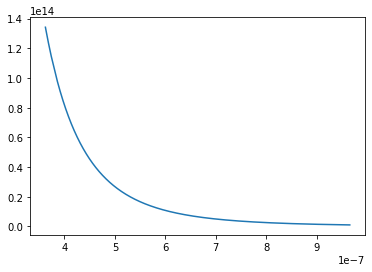

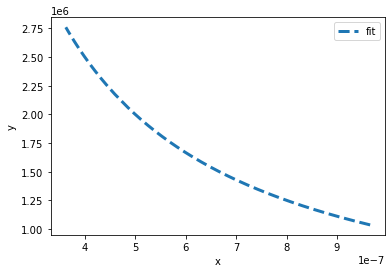

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import constants
from scipy.optimize import minimize_scalar
from scipy.optimize import leastsq

h = constants.Planck
c = constants.speed_of_light
kB = constants.Boltzmann

# function for producing the curves 
def planck(wl, temp):
    return (2 * h * c**2 / wl**5) / (np.exp(h*c/(wl * kB * temp)) -1)   

# arrays to feed into the function to produce the curves 
wls = np.linspace(1E-8, 1.2E-6, 2000)
Ts = np.linspace(3000, 8000, 2000)


# to find the max we find the minimum of the following function 

def planck2_find_max(wl, temp):
    return -planck(wl, temp)

# finds the max for a given temp 
def find_max_wl(temp):
    fmin=minimize_scalar(planck2_find_max, bracket=(0.2E-7, 2E-6), args=(temp))
    return fmin.x, -fmin.fun


##positions of maxima for each T
maxl, maxv = np.zeros_like(Ts), np.zeros_like(Ts)

for i, temp in enumerate(Ts):
    maxl[i], maxv[i] = find_max_wl(temp)
    
    
plt.plot(maxl,maxv) # need to fit this curve 

def fun(Ts,B): # x = wls 
    return B*Ts # x = wls

#define the residuals function (difference between model and data)
def residuals(B, wl,Ts):
    B = B
    return wl - fun(Ts,B)



#define the residuals function (difference between model and data)

B = .00001 # initial guesses 

fitting = leastsq(residuals,B ,args = (1/Ts,maxl)) 

y_fitted= fun(Ts, fitting[0][0] )
print(fitting[0])


fig3, ax = plt.subplots()
#ax.plot(y_fitted,maxv, 'o', label='data used to fit')
ax.plot(maxl, y_fitted, '--', linewidth=3, label='fit')
ax.legend()
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.show()